# Analyzing the Translation of Verbs in the LXX

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
repo_dir = Path.home().joinpath('github/CambridgeSemiticsLab/translation_traditions_HB')

In [2]:
def get_props(counts_df, sum_i=1, div_i=0):
    return counts_df.div(counts_df.sum(sum_i), div_i) 

# Qatal

In [3]:
qatal_datapath = repo_dir.joinpath('data/_private_/verb_data/qatal_dataset.csv')
qatal_df = pd.read_csv(qatal_datapath, index_col='bhsa_node')
qatal_df.rename({'adjecent_waw':'adjacent_waw'}, inplace=True, axis=1) # fix typo
qatal_df.head()

,ref,book,book_super,canon_part,text_full,text_plain,lex,lex_etcbc,gloss,verb_form,...,esv,esv_tags,esv_VBtags,esv_TAMcx,esv_TAMspan,niv,niv_tags,niv_VBtags,niv_TAMcx,niv_TAMspan
bhsa_node,,,,,,,,,,,,,,,,,,,,,
3,Genesis 1:1,Genesis,Genesis,Law,בָּרָ֣א,ברא,ברא,BR>[,he created,qtl,...,created,VBD,VBD,past,created,created,VBD,VBD,past,created
15,Genesis 1:2,Genesis,Genesis,Law,הָיְתָ֥ה,היתה,היה,HJH[,she was,qtl,...,was,VBD,VBD,past,was,was,VBD,VBD,past,was
69,Genesis 1:5,Genesis,Genesis,Law,קָ֣רָא,קרא,קרא,QR>[,he called,qtl,...,he called,PRP|VBD,VBD,past,called,he called,PRP|VBD,VBD,past,called
172,Genesis 1:10,Genesis,Genesis,Law,קָרָ֣א,קרא,קרא,QR>[,he called,qtl,...,he called,PRP|VBD,VBD,past,called,he called,PRP|VBD,VBD,past,called
267,Genesis 1:15,Genesis,Genesis,Law,הָי֤וּ,היו,היה,HJH[,let them be,qtl,...,let them be,VB|PRP|VB,VB|VB,modal,let them be,let them be,VB|PRP|VB,VB|VB,modal,let them be


In [4]:
qatal_df.columns

Index(['ref', 'book', 'book_super', 'canon_part', 'text_full', 'text_plain',
       'lex', 'lex_etcbc', 'gloss', 'verb_form', 'stem', 'person', 'gender',
       'number', 'sentence', 'genre', 'domain', 'period', 'txt_type',
       'clause_type', 'clause_rela', 'adjacent_waw', 'preceding_waw',
       'valence', 'lxx', 'lxx_tense', 'lxx_voice', 'lxx_mood', 'lxx_person',
       'lxx_number', 'esv', 'esv_tags', 'esv_VBtags', 'esv_TAMcx',
       'esv_TAMspan', 'niv', 'niv_tags', 'niv_VBtags', 'niv_TAMcx',
       'niv_TAMspan'],
      dtype='object')

In [5]:
qatal_df

,ref,book,book_super,canon_part,text_full,text_plain,lex,lex_etcbc,gloss,verb_form,...,esv,esv_tags,esv_VBtags,esv_TAMcx,esv_TAMspan,niv,niv_tags,niv_VBtags,niv_TAMcx,niv_TAMspan
bhsa_node,,,,,,,,,,,,,,,,,,,,,
3,Genesis 1:1,Genesis,Genesis,Law,בָּרָ֣א,ברא,ברא,BR>[,he created,qtl,...,created,VBD,VBD,past,created,created,VBD,VBD,past,created
15,Genesis 1:2,Genesis,Genesis,Law,הָיְתָ֥ה,היתה,היה,HJH[,she was,qtl,...,was,VBD,VBD,past,was,was,VBD,VBD,past,was
69,Genesis 1:5,Genesis,Genesis,Law,קָ֣רָא,קרא,קרא,QR>[,he called,qtl,...,he called,PRP|VBD,VBD,past,called,he called,PRP|VBD,VBD,past,called
172,Genesis 1:10,Genesis,Genesis,Law,קָרָ֣א,קרא,קרא,QR>[,he called,qtl,...,he called,PRP|VBD,VBD,past,called,he called,PRP|VBD,VBD,past,called
267,Genesis 1:15,Genesis,Genesis,Law,הָי֤וּ,היו,היה,HJH[,let them be,qtl,...,let them be,VB|PRP|VB,VB|VB,modal,let them be,let them be,VB|PRP|VB,VB|VB,modal,let them be
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426508,2_Chronicles 36:21,2_Chronicles,Chronicles,Writings,שָׁבָ֔תָה,שׁבתה,שׁבת,CBT[,she rested,qtl,...,kept Sabbath,VBD|NNP,VBD,past,kept,it rested,PRP|VBD,VBD,past,rested
426528,2_Chronicles 36:22,2_Chronicles,Chronicles,Writings,הֵעִ֣יר,העיר,עור,<WR[,he moved,qtl,...,stirred up,VBD|RP,VBD,past,stirred,moved,VBD,VBD,past,moved
426548,2_Chronicles 36:23,2_Chronicles,Chronicles,Writings,אָמַ֞ר,אמר,אמר,>MR[,he says,qtl,...,says,VBZ,VBZ,present,says,says,VBZ,VBZ,present,says


### statistics by book

In [56]:
vts_book = pd.pivot_table(
        qatal_df[qatal_df.lxx_mood == 'indc'],
        index='book_super',
        columns=['lxx_tense', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0
)

# sort by most frequent to least
vts_book = vts_book[vts_book.sum().sort_values(ascending=False).index]
vts_book.drop('pluperfect', level='lxx_tense', axis=1, inplace=True) # NB: Exclude pluperfect for lack of examples

# vts_book_prop = {}

# for waw_status in (True, False):
#     vts_book_prop = 
    
#     vts_book_props = get_props(vts_book)

vts_book.head()

lxx_tense,aorist,future,perfect,present,imperfect,aorist,future,imperfect,present,perfect
adjacent_waw,False,True,False,False,False,True,False,True,True,True
book_super,,,,,,,,,,
Chronicles,807,53,28,17,72,25,1,5,1,2
Daniel,177,61,6,2,11,35,2,3,1,0
Deuteronomy,388,429,51,21,20,6,3,0,1,0
Exodus,286,408,75,21,26,11,2,10,2,0
Ezekiel,404,648,93,140,51,32,29,3,4,4


In [57]:
vts_book_clean = vts_book.groupby(level='lxx_tense', axis=1).sum()

vts_book_clean.head()

lxx_tense,aorist,future,imperfect,perfect,present
book_super,,,,,
Chronicles,832,54,77,30,18
Daniel,212,63,14,6,3
Deuteronomy,394,432,20,51,22
Exodus,297,410,36,75,23
Ezekiel,436,677,54,97,144


In [58]:
vts_book_clean.sum()

lxx_tense
aorist       9687
future       4667
imperfect     663
perfect       949
present       885
dtype: int64

### statistics across parts of canon (tripartite)

In [61]:
vts_canon = pd.pivot_table(
        qatal_df[qatal_df.lxx_mood == 'indc'],
        index='canon_part',
        columns=['lxx_tense', 'adjacent_waw'],
        aggfunc='size',
        fill_value=0,
)

vts_canon.drop('pluperfect', level='lxx_tense', axis=1, inplace=True)

vts_canon

lxx_tense    aorist       future       imperfect       perfect       present  \
adjacent_waw  False True   False True      False True    False True    False   
canon_part                                                                     
Law            1655    36     19  1912       119    24     276     1     110   
Prophets       4410   214    237  2221       292    39     515    12     574   
Writings       3203   169     71   207       174    15     138     7     144   

lxx_tense           
adjacent_waw True   
canon_part          
Law              6  
Prophets        32  
Writings        19

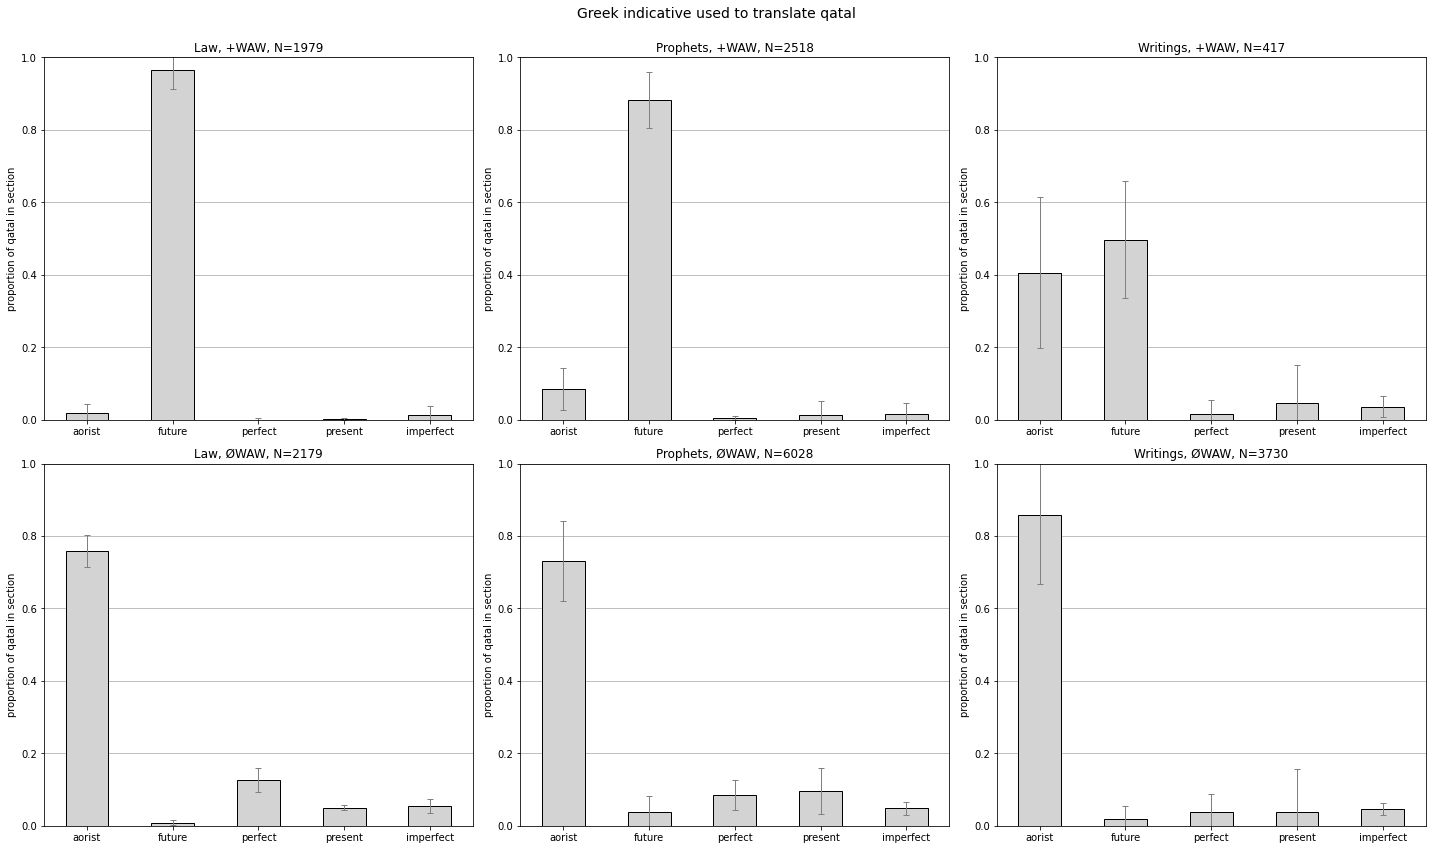

In [93]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
axs = axs.ravel()

i = 0
for waw_status, waw_str in [[True, ', +WAW'], [False, ', ØWAW']]:
    
    count_books = vts_book.loc[:, pd.IndexSlice[:, waw_status]]
    count_can = vts_canon.loc[:, pd.IndexSlice[:, waw_status]]
    prop_books = get_props(count_books)
    prop_can = get_props(count_can)
    prop_can.columns = prop_can.columns.droplevel('adjacent_waw')
    prop_books.columns = prop_books.columns.droplevel('adjacent_waw')
    prop_can = prop_can[vts_book_clean.sum().sort_values(ascending=False).index] # sort on size of samples
    
    for part in prop_can.index:
                
        ax = axs[i]
        i += 1
            
        data = prop_can.loc[part]
        
        books = qatal_df[qatal_df.canon_part == part].book_super.unique()
        tense_stds_inbooks = prop_books.loc[books].std()
        
        data.plot(
            kind='bar', ax=ax, color='lightgrey', 
            edgecolor='black', yerr=tense_stds_inbooks,
            error_kw=dict(ecolor='gray', lw=1, capsize=3)
        )
        
        title = f'{part}{waw_str}, N={count_can.loc[part].sum().sum()}'
        ax.set_title(title)
        ax.set_ylim(0, 1)
        ax.grid(axis='y')
        ax.set_axisbelow(True)
        ax.set_xlabel('')
        ax.set_ylabel('proportion of qatal in section')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        
fig.suptitle('Greek indicative used to translate qatal\n', size=14)
fig.tight_layout() # set spacing between plots automatically

#### Book-by-book for Pentateuch

In [67]:
pent = ['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy']

In [69]:
# fig, axs = plt.subplots(1, 4, figsize=(25, 6))
# axs = axs.ravel()

# for book,ax in zip(pent, axs):
#     data = vts_book_props.loc[book]
#     data.plot(kind='bar', ax=ax, color='lightgrey', edgecolor='black')
#     ax.set_title(book)
#     ax.set_ylim(0, 0.75)
#     ax.grid(axis='y')
#     ax.set_axisbelow(True)

### statistics by genre

### statistics by period (EBH vs. LBH)